# Tutorial: Inverse Participation Ratio (IPR) Analysis

## Introduction

The **Inverse Participation Ratio (IPR)** is a powerful computational tool used in electronic structure calculations to identify and quantify the localization of electronic states in materials. This tutorial will guide you through understanding what IPR is, why it's important, and how to use PyProcar to analyze IPR in real materials.

## What is the Inverse Participation Ratio?

### Physical Concept

In condensed matter physics, electronic states can be broadly classified into two categories:

1. **Extended states**: Electronic wavefunctions that are delocalized across the entire crystal, typical of bulk electronic states
2. **Localized states**: Electronic wavefunctions that are confined to specific regions, such as surface states, defect states, or interface states

The IPR provides a quantitative measure to distinguish between these two types of states. It is particularly valuable because traditional methods of identifying localized states—such as examining atomic projections—can be cumbersome and sometimes misleading.

### Mathematical Definition

The Inverse Participation Ratio is defined as:

$$IPR_{nk} = \frac{\sum_{a} |c_{nka}|^4}{\left(\sum_a |c_{nka}|^2\right)^2}$$

where:
- $n$ is the band index
- $k$ is the k-point index  
- $a$ is the atom index
- $c_{nka}$ are the wavefunction coefficients

### Interpretation of IPR Values

The IPR provides intuitive values that directly relate to the degree of localization:

- **IPR = 1**: Perfectly localized state (wavefunction concentrated on a single atom)
- **IPR = 1/N**: Perfectly delocalized state (wavefunction equally distributed across all N atoms)
- **Intermediate values**: Partially localized states

## Why is IPR Important?

### 1. **Surface and Interface States**
Surface states are crucial for understanding:
- Electronic transport at interfaces
- Catalytic activity
- Topological properties

### 2. **Defect Level Identification** 
IPR is invaluable for studying:
- Point defects in semiconductors
- Color centers in wide-bandgap materials
- Single-photon emitters

### 3. **Anderson Localization**
Originally developed to study Anderson localization, IPR helps identify:
- Disorder-induced localized states
- Metal-insulator transitions
- Transport properties in disordered systems

### 4. **Advantages over Traditional Methods**

Traditional approaches for identifying localized states involve examining atomic orbital projections around suspected atoms (e.g., surface or defect atoms). However, this approach has limitations:

- **User bias**: Requires prior knowledge of where localization might occur
- **Computational overhead**: Need to calculate projections for many different atomic combinations
- **False negatives**: Some localized states may have minimal projection on the expected atoms

IPR overcomes these limitations by providing a single, unbiased metric that automatically identifies localized states regardless of their spatial distribution.

## Practical Applications

This tutorial demonstrates IPR analysis through two important examples:

1. **Topological surface states in Bi₂Se₃**: Identifying topologically protected surface states
2. **NV⁻ defect levels in diamond**: Locating defect states relevant for quantum applications

## Getting Started

Before we begin the analysis, let's set up our environment and download the necessary data files.

## Setting up the Environment

In this section, we'll import the necessary libraries and download the example data files for our IPR analysis. We'll be working with two materials:

1. **Bi₂Se₃**: A topological insulator with well-known surface states
2. **Diamond with NV⁻ defect**: A quantum defect system with localized electronic states

Let's start by importing the required libraries and setting up our data directories:

In [1]:
# Import required libraries
from pathlib import Path
import pyprocar
import numpy as np

# Setup data directories
CURRENT_DIR = Path(".").resolve()
print(f"Current working directory: {CURRENT_DIR}")

# Download the autobands example data
IPR_PATH = "data/examples/bands/ipr"
pyprocar.download_from_hf(relpath=IPR_PATH, output_path=CURRENT_DIR)

BISE_DATA_DIR = CURRENT_DIR / IPR_PATH / "Bi2Se3-spinorbit-surface"
NV_DATA_DIR = CURRENT_DIR / IPR_PATH / "NV-center"

# Define data directory
print(f"Autobands data downloaded to: {BISE_DATA_DIR}")
print(f"Autobands data downloaded to: {NV_DATA_DIR}")

Current working directory: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure
Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\ipr
Autobands data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\ipr\Bi2Se3-spinorbit-surface
Autobands data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\ipr\NV-center


## Example 1: Topologically-Protected Surface States in Bi₂Se₃

The first example is the detection of **topologically-protected surface states** in $Bi_2Se_3$. [zhang2009] The whole slab has six van der Waals layers (quintuple layers), each five atoms thick. The surface states localize on the outer quintuple layers, in contrast to an extended state that covers all six quintuple layers. The ratio between the localization of both types of states is 1 to 3, and the **Inverse Participation Ratio (IPR)** has enough resolution to provide a clear visual identification.

### Background

Bi₂Se₃ is a well-known three-dimensional topological insulator that exhibits topologically protected surface states. These surface states:

- Are metallic and cross the bulk bandgap
- Are protected by time-reversal symmetry
- Have a Dirac cone dispersion near the surface
- Are immune to backscattering from non-magnetic impurities

### System Description

Our Bi₂Se₃ slab contains:
- **6 quintuple layers** (each quintuple layer = 5 atomic layers)
- **Total thickness**: 30 atomic layers
- **Surface states**: Localized on the outer quintuple layers
- **Bulk states**: Extended across all 6 quintuple layers

### IPR Analysis Expectations

Based on the system geometry, we expect:
- **Surface states**: Higher IPR values (localized on ~1/6 of the slab)  
- **Bulk states**: Lower IPR values (extended across the entire slab)
- **IPR contrast ratio**: Approximately 3:1 between surface and bulk states

Let's visualize the band structure with IPR coloring:

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

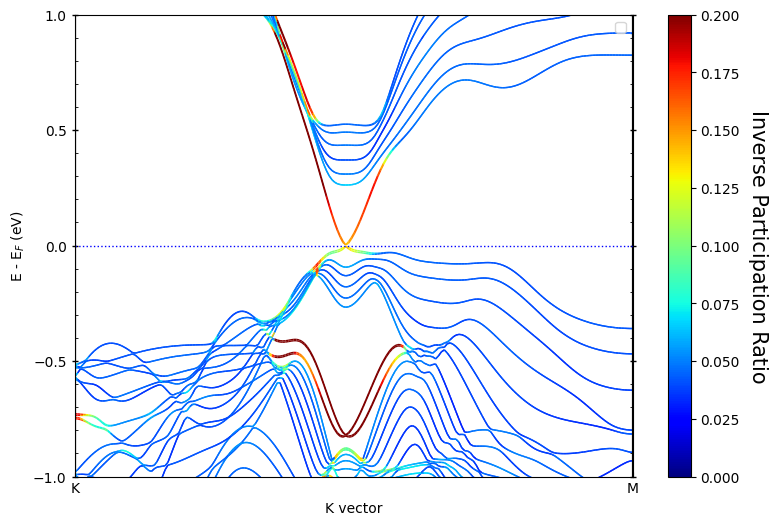


Interpretation of the IPR plot:
• Red/warm colors: High IPR values → Localized states (surface states)
• Blue/cool colors: Low IPR values → Extended states (bulk states)
• The surface states crossing the bandgap should appear in red
• Bulk bands should appear predominantly in blue


In [2]:
# Plot band structure with IPR coloring for Bi₂Se₃
pyprocar.bandsplot(
    dirname=BISE_DATA_DIR,
    elimit=[-1.0, 1.0],          # Energy window around the Fermi level
    mode="ipr",                   # Use IPR mode for visualization
    code="vasp",                  # DFT code used for calculation
    spins=[0],                    # Plot only one spin channel
    fermi=2.0446,                 # Fermi energy from self-consistent calculation
    clim=[0, 0.2],               # Color scale limits for IPR values
)

print("\nInterpretation of the IPR plot:")
print("• Red/warm colors: High IPR values → Localized states (surface states)")
print("• Blue/cool colors: Low IPR values → Extended states (bulk states)")
print("• The surface states crossing the bandgap should appear in red")
print("• Bulk bands should appear predominantly in blue")

## Example 2: NV⁻ Defect States in Diamond


The second example is the $NV^-$ defect in diamond; it's a negatively charged N substitution plus an adjacent vacancy. This defect is of interest as a source of single photons. Its ground state is a triplet, allowing the control of the spin by microwave radiation. [DOHERTY2013]The supercell has 215 atoms, hence $IPR\to0$ for bulk states (blue lines). Several defect levels lie within the fundamental band gap of diamond (dark red lines). The closest levels to the Fermi energy are double degenerate (i.e., triplet), but only occupied for the spin majority. Hence, the optical transition takes place between the bands with index $430\to431$ or $430\to432$ of the spin channel labeled `spin-1`. The calculation of the main emission line involves a calculation of the excited state, which can be simulated by fixing the occupations of the mentioned levels, i.e., the $\Delta$SCF method. [Jin2021]

### Background

The nitrogen-vacancy (NV⁻) center in diamond is one of the most important quantum defects for applications in:
- **Quantum sensing**: Single-spin magnetometry and thermometry
- **Quantum information**: Single-photon sources and qubits
- **Biomedical imaging**: Fluorescent markers for biological systems

### Defect Structure

The NV⁻ defect consists of:
- **Nitrogen substitution**: A nitrogen atom replacing a carbon atom
- **Adjacent vacancy**: An empty lattice site next to the nitrogen
- **Extra electron**: Making the system negatively charged

### Electronic Properties

Key features of the NV⁻ electronic structure:
- **Ground state**: Spin triplet (S = 1)
- **Defect levels**: Electronic states within the diamond bandgap
- **Optical transitions**: Between defect levels for single-photon emission
- **Spin control**: Microwave manipulation of the triplet state

### System Description

Our diamond supercell contains:
- **215 carbon atoms** + 1 nitrogen + 1 vacancy
- **Large supercell**: Ensures minimal defect-defect interactions
- **Wide bandgap**: ~5.5 eV for pristine diamond

### IPR Analysis Expectations

For this system, we expect:
- **Bulk states**: Very low IPR values (≈ 1/215 ≈ 0.005) - extended across all atoms
- **Defect states**: Significantly higher IPR values - localized around the NV center
- **Clear distinction**: Orders of magnitude difference between bulk and defect IPR values

Let's analyze the electronic structure:

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\pyprocar\plotter\ebs_plot.py:725: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.ax.set_xlim(interval)


Atomic plot: bands.shape  : (2, 540, 2)
Atomic plot: spd.shape    : (2, 540, 2, 215, 9)
Atomic plot: kpoints.shape: (2, 3)


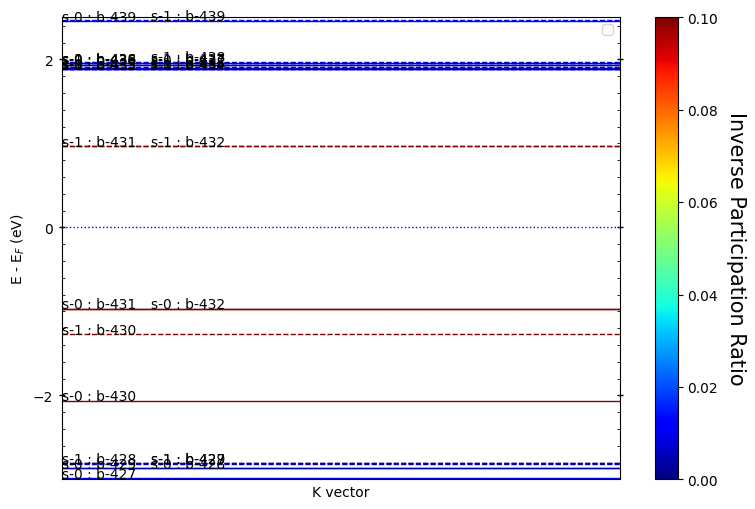


Interpretation of the NV⁻ defect IPR plot:
• Blue bands: Bulk diamond states with very low IPR values (~0.005)
• Red bands in the gap: Defect states with high IPR values
• Spin channels: Different occupations due to triplet ground state
• Band indices ~430-432: Key levels for optical transitions
• Energy gap: Wide bandgap of diamond (~5.5 eV)

Expected IPR values:
• Bulk states: ~1/215 = 0.0047
• Defect states: Significantly higher (shown in red)
• Color scale max: 0.1 - much higher than bulk value


In [3]:
# Plot band structure with IPR coloring for NV⁻ defect in diamond
pyprocar.bandsplot(
    dirname=NV_DATA_DIR,
    elimit=[-3.0, 2.5],           # Energy window around the defect levels
    mode="ipr",                   # Use IPR mode for visualization
    code="vasp",                  # DFT code used for calculation
    fermi=12.4563,                # Fermi energy from self-consistent calculation
    spins=[0, 1],                 # Plot both spin channels (important for triplet state)
    clim=[0, 0.1],               # Color scale limits for IPR values
    # savefig="nv_defect_ipr_bands.png"  # Save the figure
)

print("\nInterpretation of the NV⁻ defect IPR plot:")
print("• Blue bands: Bulk diamond states with very low IPR values (~0.005)")
print("• Red bands in the gap: Defect states with high IPR values")
print("• Spin channels: Different occupations due to triplet ground state")
print("• Band indices ~430-432: Key levels for optical transitions")
print("• Energy gap: Wide bandgap of diamond (~5.5 eV)")

print(f"\nExpected IPR values:")
print(f"• Bulk states: ~1/215 = {1/215:.4f}")
print(f"• Defect states: Significantly higher (shown in red)")
print(f"• Color scale max: {0.1} - much higher than bulk value")

## Summary and Key Takeaways

### What We Learned

Through this tutorial, we demonstrated how the Inverse Participation Ratio (IPR) provides a powerful, unbiased method for identifying localized electronic states in materials. The two examples showcased different types of localization:

1. **Bi₂Se₃ Surface States**:
   - **Type**: Topologically protected surface states
   - **Localization**: Confined to surface layers in a slab geometry
   - **IPR contrast**: Factor of ~3 between surface and bulk states
   - **Applications**: Topological electronics, spintronics

2. **NV⁻ Defect States**:
   - **Type**: Point defect states in a wide-bandgap semiconductor  
   - **Localization**: Confined around the nitrogen-vacancy complex
   - **IPR contrast**: Orders of magnitude difference from bulk states
   - **Applications**: Quantum sensing, single-photon sources

### Advantages of IPR Analysis

1. **Automated Detection**: No need to manually specify which atoms to examine
2. **Quantitative Measure**: Provides numerical values for comparison
3. **Universal Applicability**: Works for any type of localized state
4. **Computational Efficiency**: Single calculation reveals all localized states

### When to Use IPR

IPR analysis is particularly valuable for:
- **Unknown localization**: When you don't know where states might be localized
- **Systematic studies**: Comparing localization across different materials or conditions
- **Defect identification**: Quickly identifying which electronic states are defect-related
- **Surface studies**: Distinguishing surface from bulk states in slab calculations

### PyProcar Implementation

Using PyProcar's IPR mode is straightforward:

```python
pyprocar.bandsplot(
    dirname="path/to/calculation",
    mode="ipr",                    # Key parameter for IPR analysis
    clim=[vmin, vmax],            # Set appropriate color scale
    elimit=[emin, emax],          # Focus on energy region of interest
    code="vasp"                   # Or other supported DFT codes
)
```

### Next Steps

To further explore IPR analysis, consider:
- Varying the color scale (`clim`) to highlight different levels of localization
- Combining IPR with other PyProcar modes for comprehensive analysis
- Analyzing IPR as a function of external parameters (strain, doping, etc.)
- Using IPR for materials discovery and characterization

The IPR method represents a significant advancement in electronic structure analysis, providing researchers with a robust tool for understanding localization phenomena in quantum materials.
